<a href="https://colab.research.google.com/github/Maucho6340/1764-estadistica-con-python-probabilidad-y-muestreo/blob/main/Curso_de_Etad%C3%ADstica_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTADÍSTICA - PARTE 2</font>
***

# <font color=green>1 CONOCIENDO LOS DATOS</font>
***

## <font color=green>1.1 Dataset del proyecto</font>
***

### Encuesta Nacional por Muestreo de Hogares - 2015

La **Encuesta Nacional por Muestreo de Hogares - ENMH** en Brasil anualmente investiga, de manera permanente, características generales de la población, educación, trabajo, ingresos, vivienda y otras, con frecuencia variables, de acuerdo a las necesidades de información del país, tales como las características de migración, fecundidad, nupcialidad, salud, seguridad alimentaria, entre otros temas. La recopilación de estas estadísticas constituye, durante los 49 años de realización de la investigación, un importante instrumento para la formulación, validación y evaluación de políticas orientadas al desarrollo socioeconómico y la mejora de las condiciones de vida en Brasil.

### Fuente de los Datos

Instituto Brasileño de Geografía y Estadística (IBGE) Encuesta Nacional por Muestreo de Hogares(PNAD) en el 2015

### Variables utilizadas

> ### Ingresos
> ***

Ingresos mensuales del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del residente en años en la fecha de referencia .

> ### Altura (elaboración propia)
> ***

Altura del habitante en metros.

> ### UF
> ***

Unidad Federal

|Código|Descripción|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin educación o menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No determinado|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indígena|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Pardo|
|9|Sin declarar|

#### <font color='red'>Nota</font>
***
> Se realizaron los siguientes tratamientos sobre los datos originales:
> 1. Se eliminaron los registros en los que **Ingreso** no era válido. (999 999 999 999);
> 2. Se eliminaron los registros en los que **Ingreso** eran missing;
> 3. Solo se consideraron los registros de **Personas de Referencia** de cada hogar (responsable del hogar).

### Importando pandas y leyendo el dataset del proyecto

https://pandas.pydata.org/

In [4]:
import pandas as pd


In [5]:
datos = pd.read_csv('datos.csv', encoding='latin-1')

In [6]:
datos.head()

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [7]:
datos.sample(10)

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
5067,14,0,68,8,1,400,1.663617
39277,31,0,27,4,12,2500,1.570152
18325,24,1,59,2,16,2600,1.624821
42544,33,0,45,2,1,1000,1.798668
28850,29,0,56,8,12,1576,1.713803
25457,28,0,51,2,1,788,1.681211
14966,23,1,24,8,12,1000,1.563009
7267,15,0,51,8,2,800,1.730910
36760,31,0,28,2,16,4500,1.813842
13532,22,0,39,8,16,1200,1.673645


---
---

# <font color=green>2 DISTRIBUCIONES DE PROBABILIDAD</font>
***

## <font color=red>Problema</font>
***

En una competencia para ocupar un puesto de científico de datos, tenemos un total de **10 preguntas** de opción múltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide hacer la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuación de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y también la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selección**.

## <font color=green>2.1 Distribución Binomial</font>
***

Un evento **binomial** se caracteriza por la posibilidad de que solo ocurran dos categorías. Estas categorías juntas representan todo el espacio muestral, siendo también mutuamente excluyentes, es decir, la ocurrencia de una implica la no ocurrencia de la otra.

En el análisis estadístico, el uso más común de la distribución binomial es para resolver problemas que involucran situaciones de **éxito** y **fracaso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Donde:

$p$ = probabilidad de éxito

$q = (1 - p)$ = probabilidad de fracaso

$n$ = número de eventos estudiados

$k$ = número de eventos deseados que tienen éxito

### Experimento Binomial

1. Realización de $n$ pruebas idénticas.

2. Las pruebas son independientes.

3. Solo son posibles dos resultados, por ejemplo: Verdadero o falso; Cara o cruz; Éxito o fracaso.

4. La probabilidad de éxito está representada por $p$ y la probabilidad de fracaso por $1-p = q$. Estas probabilidades no cambian de una prueba para otra.

### Media de la distribución binomial

El valor esperado o la media de la distribución binomial es igual al número de experimentos realizados multiplicado por la probabilidad de que ocurra el evento.

# $$\mu = n \times p$$

### Desviación estándar de la distribución binomial

La desviación estándar es la raíz quadrada del producto entre el número de experimentos, la probabilidad de éxito y la probabilidad de fracaso.

# $$\sigma = \sqrt{n \times p \times q}$$

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

In [8]:
from scipy.special import comb

### Combinaciones

El número de combinaciones de $n$ objetos, tomando $k$ cada vez, es:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Donde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definición

## $$0! = 1$$

## <font color='blue'>Ejemplo: Mega Sena</font>

En una rueda de lotería Mega Sena tenemos un total de **60 números** para elegir, donde la apuesta mínima es de **seis números**. Usted que es curioso(a) decide calcular la probabilidad de ganar la Mega Sena con solo **un juego**. Para eso necesitamos saber cuántas **combinaciones de seis números se pueden formar con los 60 números disponibles**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [9]:
combinaciones_1 = comb(60,6)
combinaciones_1

np.float64(50063860.0)

In [10]:
probabilidad_1 = 1/combinaciones_1
print('%0.15f' % probabilidad_1)

0.000000019974489


Supongamos que acabamos de crear un juego de lotería llamado Exposición de Premios de Alura. En este nuevo juego, el que apuesta marca 20 números, de los 25 disponibles en el boleto, y puede ganar hasta 1 millón de pesos.

Determine el número de combinaciones posibles (espacio muestral) y la probabilidad de ganar el premio jugando solo un boleto (considere sólo quince lugares decimales).

In [11]:
combinaciones_2 = comb(25,20)
combinaciones_2

np.float64(53130.0)

In [12]:
probabilidad_2 = 1/combinaciones_2
print('%0.15f' % probabilidad_2)

0.000018821757952


## <font color='blue'>Ejemplo: Concurso para científico de datos</font>

En una competencia para ocupar un puesto de científico de datos, tenemos un total de **10 preguntas** de opción múltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide tomar la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuación de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y también la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selección**.

Identificar características:<br>

1. Realización de pruebas idénticas
- Realización de n pruebas idénticas: SI. Cada pregunta  (10 en total) es un experimento y cada pregunta es idéntica.
2. Las pruebas son independientes: SI. Por que la primera pregunta no tiene nada que ver con la segunda y la 2da nada que ver con la 3ra y así sucesivamente. En cada pregunta va a intentar adivinar aleatoriamente la pregunta.
3. Solo son posibles dos resultados, por ejemplo: Verdadero o falso; Cara o cruz; Éxito o fracaso. SI. Cada pregunta tienen tress opciones, pero el candidato solo tiene dos, adivinar o errar.
4. La probabilidad de éxito está representada por  p  y la probabilidad de fracaso por  1−p=q . Estas probabilidades no cambian de una prueba para otra.

### ¿Cuál es la cantidad de pruebas ($n$)?

In [13]:
n=10

### ¿Las pruebas son independientes?

Sí. La opción elegida en una pregunta no influye en la opción elegida en otra pregunta.

### ¿Sólo dos resultados son posibles en cada prueba?

Sí. El candidato tiene dos posibilidades, ACERTAR o FALLAR una pregunta.

### ¿Cuál es la probabilidad de éxito ($p$)?

In [14]:
numero_de_alternativas_por_pregunta = 3
p = 1/numero_de_alternativas_por_pregunta
p

0.3333333333333333

### ¿Cuál es la probabilidad de fracaso ($q$)?

In [15]:
q = 1-p
q

0.6666666666666667

### ¿Cuál es el número total de eventos para tener éxito ($k$)?

In [16]:
k=5

### Solución 1

In [17]:
probabilidad_3 = (comb(10,5)*(p**k)*(q**(n-k)))

print(f'La probabilidad es {probabilidad_3:.5} %')

La probabilidad es 0.13656 %


### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [18]:
from scipy.stats import binom

### Solución 2

In [19]:
probabilidad_4=binom.pmf(k,n,p)
print(f'La probabilidad es {probabilidad_4:.5} %')

La probabilidad es 0.13656 %


### Obtenga la probabilidad de que el candidato apruebe

sabemos que aprueba tanto si obtiene 5 preguntas correctas, como si obtiene 6 ó 7 u 8 ó 9 ó 10.<br>
Entonces debemos calcular cada una de las probabilidades en cada obtener 5 ó 6 ó 7 ó 8 ó 9 ó 10 preguntas y luego sumarlas, essta manera es la mass trabajossa, pero la mas intuitiva.

### $$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P(10)$$

In [20]:
binom.pmf(5,n,p)+binom.pmf(6,n,p)+binom.pmf(7,n,p)+binom.pmf(8,n,p)+binom.pmf(9,n,p)+binom.pmf(10,n,p)

np.float64(0.21312808006909476)

Existe un opción. Usar listas

In [21]:
binom.pmf([5,6,7,8,9,10],n,p)

array([1.36564548e-01, 5.69018950e-02, 1.62576843e-02, 3.04831581e-03,
       3.38701756e-04, 1.69350878e-05])

In [22]:
binom.pmf([5,6,7,8,9,10],n,p).sum()

np.float64(0.21312808006909476)

Función acumulativa.<br>
Voy a calcular la probabilidad de acertar 0,1,2,3 y 4 preguntas. E la probabilidad de acertar 4 preguntas, que al restar a 1, me va a dar la probabilidad de acertar a 5 y mas preguntas. O ea, 1-probabilidad de acertar 4.

In [23]:
1-binom.cdf(4,n,p)

np.float64(0.21312808006909523)

Existe una función que permite calcular 1 - probabilidad

In [24]:
binom.sf(4,n,p)

np.float64(0.21312808006909525)

Pregunta 1: Una moneda perfectamente equilibrada se lanza al aire cuatro veces. Usando la distribución binomial, obtenga la probabilidad de que la moneda caiga con la cruz hacia arriba dos veces.

In [25]:
# Parámetros del experimento
n = 4       # número de lanzamientos
k = 2       # número de veces que queremos cruz
p = 0.5     # probabilidad de cruz (moneda equilibrada)

# Calcular la probabilidad usando la función de masa de probabilidad
probabilidad = binom.pmf(k, n, p)

# Mostrar resultado
print(f"La probabilidad de obtener exactamente 2 cruces es: {probabilidad:.4f}")

La probabilidad de obtener exactamente 2 cruces es: 0.3750


Pregunta 2: Un dado perfectamente equilibrado se lanza hacia arriba diez veces. Usando la distribución binomial, obtenga la probabilidad de que los dados caigan con el número cinco hacia arriba al menos tres veces.

In [26]:
from scipy.stats import binom

p = 1 / 6   # Probabilidad de salir el número CINCO
n = 10      # Total de lanzamientos

print(f'{binom.sf(2, n, p):.2%}')
# Mostrar resultado
# print(f"La probabilidad de lanzar 10 veces una dado al aire y obtener 5, tres veces: {probabilidad:.4f}")

22.48%


## <font color='blue'>Ejemplo: Yincana</font>

Una ciudad del interior realiza una yincana cada año para recaudar fondos para el hospital de la ciudad. En la última competencia se sabe que la **proporción de mujeres participantes fue del 60%**. **El número total de equipos, con 12 miembros, inscritos en la yincana de este año es 30**. Con la información anterior, responda: ¿Cuántos equipos deberían estar formados por **8 mujeres**?

In [27]:
n

10

### Entendiendo el problema
i tuviera un saco de personas, voy a seleccionar 12 para formar un equipo

### Solución
Se divide el problema en dos partes.<br>
1ro Descubrir cuál es la probailidad de un equipo esté formado por 8 mujeres y 4 hombres.<br>
2do Calculamos, cuántos de los 30 equipos están conformados por 8 mujeres en media.


---



In [28]:
p=0.6 #La probabilidad de seleccionar una mujer es de 60%

In [29]:
n=12 # La cantidad de peronas en el equipo.

In [30]:
k=8 # La cantidad de mujeres en un equipo

In [31]:
probabilidad_5=binom.pmf(k,n,p) #probabilida de tener 8 mujeres en cada equipo
print(f'La probabilidad es {probabilidad_5:.5} %')

La probabilidad es 0.21284 %


Ahora queremos saber, cuántos de los 30 equipos que van ser seleccionados, estarán conformados con esta distribución de 8 mujeres y 4 hombres. <br>
Aquí n pasa a ser 30<br> Para esto vamos a utilizar la media de la distribución binominal.

In [32]:
equipos=30*probabilidad_5
equipos

np.float64(6.3852281856)

Suponga que la probabilidad de que una pareja tenga hijos con ojos azules es del 22%. En 50 familias, con 3 hijos cada una, ¿cuántas podemos esperar que tengan dos hijos con ojos azules?

In [33]:
# Parámetros
n = 3           # Hijos por familia
k = 2           # Hijos con ojos azules
p = 0.22        # Probabilidad de ojos azules
familias = 50   # Número de familias

# Probabilidad de exactamente 2 hijos con ojos azules en una familia
probabilidad = binom.pmf(k, n, p)

# Número esperado de familias con 2 hijos con ojos azules
esperado = familias * probabilidad

print(f"Probabilidad de 2 hijos con ojos azules en una familia: {probabilidad:.15f}")
print(f"Familias esperadas con ese resultado: {esperado:.2f}")

Probabilidad de 2 hijos con ojos azules en una familia: 0.113256000000000
Familias esperadas con ese resultado: 5.66


---
---

## <font color=red>Problema</font>
***

Un restaurante recibe un promedio de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

## <font color=green>2.2 Distribución Poisson</font>
***

Se utiliza para describir el número de ocurrencias en un tiempo o espacio específico. Los eventos se caracterizan por la posibilidad de contar los éxitos, pero no poder contar los fracasos.

Como ejemplos de procesos donde podemos aplicar la distribución de Poisson tenemos la determinación del número de clientes que ingresan a una tienda en un momento determinado, el número de autos que llegan a un Auto-servicio de una cafetería a la hora del almuerzo, la determinación del número de accidentes registrados en un tramo de carretera, etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Donde:

$e$ = constante cuyo valor aproximado es 2.718281828459045

$\mu$ = representa el número promedio de ocurrencias en un intervalo de tiempo o espacio dado

$k$ = número de éxitos en el intervalo deseado

### Experimento Poisson

1. La probabilidad de que ocurra es la misma en todo el intervalo observado.

2. El número de ocurrencias en un intervalo dado es independiente del número de ocurrencias en otros intervalos.

3. La probabilidad de que ocurra es la misma en intervalos de igual longitud.

### Media de la distribución Poisson

# $$\mu$$

### Desviación estándar de la distribución Poisson

# $$\sigma = \sqrt{\mu}$$

### Importando bibliotecas

http://www.numpy.org/

In [34]:
import numpy as np

In [35]:
np.e #constante de euler

2.718281828459045

## <font color='blue'>Ejemplo: Delivery</font>

Un restaurante recibe un promedio de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

### ¿Cuál es el número promedio de ocurrencias por hora ($\mu$)?

In [36]:
# Cantidad de éxitos, donde éxito=pedido
media=20 # 20 pedidos por hora

### ¿Qué número de ocurrencias queremos obtener en el período ($k$)?

In [37]:
k=15 # éxitos



```
# Esto tiene formato de código
```

### Solución 1 MANUAL

In [38]:
import numpy as np


In [39]:
# probabilidad_6= ((np.e**(-media))*(media**k))/np.math.factorial(k)
# print(f'La probabilidad es {probabilidad_6:.8} %')
import numpy as np
import math

media = 3.5  # ejemplo
k = 2        # número de eventos

probabilidad_6 = ((np.e ** (-media)) * (media ** k)) / math.factorial(k)
print(f'La probabilidad es {probabilidad_6:.8%}')

La probabilidad es 18.49589735%


### Importando bibliotecas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

### Solución 2 UTILIZANDO RECURSOS DE PYTHON

In [40]:
from scipy.stats import poisson

In [41]:
probabilidad = poisson.pmf(k,media)
print(f'La probabilidad es {probabilidad:.8} %')

La probabilidad es 0.18495897 %


In [42]:
# El número media de clientes que ingresan a una panadería por hora es 20.
# Obtenga la probabilidad de que, en la próxima hora, ingresen exactamente 25 clientes.

In [43]:
from scipy.stats import poisson

# Parámetros
media = 20   # promedio de clientes por hora
k = 25       # número exacto de clientes que queremos calcular

# Probabilidad de exactamente 25 clientes en una hora
probabilidad = poisson.pmf(k, media)

# Mostrar resultado con 8 decimales
print(f"La probabilidad de que ingresen exactamente 25 clientes es: {probabilidad:.8f}")

La probabilidad de que ingresen exactamente 25 clientes es: 0.04458765


---
---

## <font color=red>Problema</font>
***

En un estudio sobre la altura de los residentes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, sea menor de 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, tenga entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, tenga más de 1.90 metros.


## <font color=green>2.3 Distribución Normal</font>
***

La distribución normal es una de las más utilizadas en estadística. Es una distribución continua, donde la distribución de frecuencias de una variable cuantitativa tiene forma de campana y es simétrica en relación con su media.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img001.png' width='500px'>

### Características importantes

1. Es simétrica alrededor de la media;

2. El área bajo la curva corresponde a la proporción 1 o 100%;

3. Las medidas de tendencia central (media, mediana y moda) tienen el mismo valor;

4. Los extremos de la curva tienden al infinito en ambas direcciones y, teóricamente, nunca tocan el eje $x$;

5. La desviación estándar define la planitud y el ancho de la distribución. Las curvas más anchas y planas tienen valores de desviación estándar más altos;

6. La distribución se define por su media y desviación estándar;

7. La probabilidad siempre será igual al área bajo la curva, delimitada por los límites superior e inferior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media

La probabilidad se obtiene del área bajo la curva, delimitada por los límites superior e inferior especificados. Se puede ver un ejemplo en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img002.png' width='500px'>


Para obtener el área anterior, simplemente calcule la integral de la función para los intervalos determinados. Según la siguiente ecuación:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media

$L_i$ = límite inferior

$L_s$ = límite superior

### Tablas estandarizadas

Se crearon tablas estandarizadas para facilitar la obtención de los valores de las áreas bajo la curva normal y eliminar la necesidad de resolver integrales definidas.

Para ver los valores en una tabla estandarizada, simplemente transforme nuestra variable en una variable estandarizada $Z$.

Esta variable $Z$ representa la desviación en las desviaciones estándar de un valor de la variable original en relación con la media.

# $$Z = \frac{x-\mu}{\sigma}$$

Donde:

$x$ = variable normal con media $\mu$ y desviación estándar $\sigma$

$\sigma$ = desviación estándar

$\mu$ = media

### Construyendo la tabla normal estandarizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [44]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabla_normal_estandarizada = pd.DataFrame(
    [],
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabla_normal_estandarizada.index:
    for column in tabla_normal_estandarizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabla_normal_estandarizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabla_normal_estandarizada.rename_axis('Z', axis = 'columns', inplace = True)

tabla_normal_estandarizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img003.png' width='250px'>

La tabla anterior proporciona el área bajo la curva entre $-\infty$ y $Z$ desviaciones estándar por encima de la media. Recordando que dado que estos son valores estandarizados, tenemos $\mu = 0$.

## <font color='blue'>Ejemplo: ¿Cuánto mides?</font>

En un estudio sobre la altura de los residentes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, mida menos que 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, mida entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, mida más de 1.90 metros.

### Problema A - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img004.png' width='350px'>


El problema plantea que debemos calcular el área de la curva dede -infinito hasta 1,80 mts. Para ello, primero debemos hacer el cálculo de estandarizar la variable.

### Obtener la variable estandarizada $Z$

In [45]:
media=1.7
desvest= 0.1
x=1.8
Z=(x-media)/desvest
Z

1.0000000000000009

Ingresamos a la tabla con Z=1.0000000000000009<br>

|Z|0.00|0.01|0.02|0.03|
|---|---|---|---|---|
|0.90|0.8159|0.8186|0.8212|0.8238|
|1.00|<u>***0.8413***</u>|0.8438|0.8461|0.8485|
|1.10|0.8643|0.8665|0.8686|0.8708|

<br>
Y obtenemos el valor de 0.8413 que es la probabilidad de elegir una persona al azar y que mida menos de 1.80 mts

### Solución 1 - Utilizando la tabla

In [46]:
probabilidad = 0.8413*100
print(f'La probabilidad de obtener al azar una persona con estatura menor de 1.80 mt es de {probabilidad:.2f} %')

La probabilidad de obtener al azar una persona con estatura menor de 1.80 mt es de 84.13 %


### Solución 2 - Utilizando Scipy

In [47]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [48]:
media=1.70
desvstd=0.1
x=1.80
z=(x-media)/desvstd
z

1.0000000000000009

In [49]:
from scipy.stats import norm
probab=(norm.cdf(Z))
print(f'La probabilidad es {probab:.4f} %')

La probabilidad es 0.8413 %


#####Pregunta 03_1 Distr Normal<br>
La aplicación de una prueba Estadística en una competencia presentó un conjunto de notas normalmente distribuidas. Se encontró que el conjunto de notas tenía una media de 70 y una desviación estándar de 5 puntos.

¿Qué probabilidad hay de que un estudiante, seleccionado al azar, obtenga una puntuación inferior a 85 puntos?


In [50]:
media=70
desvest= 5
x=85
Z=(x-media)/desvest
Z

3.0

In [51]:
from scipy.stats import norm
norm.cdf(Z)

np.float64(0.9986501019683699)

### Problema B - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img005.png' width='350px'>

Por las características de simetría de la distribución normal (la distancia que separa 1.60 de la media, es la misma que separa 1.80 de la media), hace que las áreas de ambas medidas sean iguales (el área de 1.60 a 1.70 es la misma que de 1.80 a 1.70, o sea, las probabilidad de ambas medidas (1.60 y 1.80) es la misma.

### Obtener la variable estandarizada $Z$

Estrategia: Calculamos Z para 1.80 y le restamos Z para 1.60

In [52]:
#Z para 1.80
media=1.7
#print(f'La media es {media}')
desvest= 0.1
#print (f'La desviación estándar es {desvest}')
x=1.8
#print(f'El valor de x es {x}')
Z_1_8=(x-media)/desvest
print(f'El valor de Z 1.80 es {Z_1_8}')

#Z para 1.60
media=1.7
#print(f'La media es {media}')
desvest= 0.1
#print (f'La desviación estándar es {desvest}')
x=1.6
#print(f'El valor de x es {x}')
Z_1_6=(x-media)/desvest
print(f'El valor de Z 1.60 es {Z_1_6}')

#Resta entre ambos
z_def=Z_1_8+Z_1_6 #suma para representar valor absoluto
print(f'El valor de Z es {z_def:.20f}')

El valor de Z 1.80 es 1.0000000000000009
El valor de Z 1.60 es -0.9999999999999987
El valor de Z es 0.00000000000000222045


### Solución 1 - Utilizando la tabla

De la tabla, z=0<br>

|Z	|0.00	|0.01	|0.02	|
|---|---|---|---|
|0.00	|<u>**0.5000**</u>	|0.5040	|0.5080|
|0.10	|0.5398	|0.5438	|0.5478|

In [53]:
probabilidad_18_16=0.5000*100
print(f'La probabilidad de obtener al azar una persona con estatura entre 1.60 y 1.80 mt es de {probabilidad_18_16:.2f} %')

La probabilidad de obtener al azar una persona con estatura entre 1.60 y 1.80 mt es de 50.00 %


### Solución 2 - Utilizando Scipy

In [54]:
from scipy.stats import norm
probab_18_16=(norm.cdf(z_def))*100
print(f'La probabilidad de obtener al azar una persona con estatura entre 1.60 y 1.80 mt es de {probab_18_16:.2f} %')

La probabilidad de obtener al azar una persona con estatura entre 1.60 y 1.80 mt es de 50.00 %


### Problema C - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img006.png' width='350px'>

### Obtener la variable estandarizada $Z$

### Solución 1 - Utilizando la tabla<br>


In [55]:
media=1.7
#print(f'La media es {media}')
desvest= 0.1
#print (f'La desviación estándar es {desvest}')
x=1.9
#print(f'El valor de x es {x}')
Z_19=(x-media)/desvest
print(f'El valor de Z es {Z_19}')


El valor de Z es 1.9999999999999996


Ingresamos a la tabla con z=1.99<br>

|z|0.00|0.1|0.2|0.3|0.4|0.5|0.6|0.7|0.8|0.9|
|---|---|---|---|---|---|---|---|---|---|---|
|1.80	|0.9641	|0.9649	|0.9656	|0.9664	|0.9671	|0.9678	|0.9686	|0.9693	|0.9699	|0.9706|
|1.90	|0.9713	|0.9719	|0.9726	|0.9732	|0.9738	|0.9744	|0.9750	|0.9756	|0.9761	|<u>**0.9767**</u>|
|2.00	|0.9772	|0.9778	|0.9783	|0.9788	|0.9793	|0.9798	|0.9803	|0.9808	|0.9812	|0.9817|

Obtenemos: <u>**0.9767**</u>

In [56]:
probabilidad_19=0.9767*100
print(f'La probabilidad de obtener estatura menor o = a 1.90 es {probabilidad_19:.2f} %')

La probabilidad de obtener estatura menor o = a 1.90 es 97.67 %


Pero como necesitamos el valor del área de la curva después de 1.90, tenemos que restar este valor a 1

In [57]:
Probabilidad_1_9_def= (1 -0.9767)*100
print(f'La probabilidad de obtener estatura mayor a 1.90 es {Probabilidad_1_9_def:.2f} %')

La probabilidad de obtener estatura mayor a 1.90 es 2.33 %


### Solución 2 - Utilizando Scipy

In [58]:
media=1.7
desvest= 0.1
x=1.9
Z_19=(x-media)/desvest
print(f'El valor de Z es {Z_19}')
from scipy.stats import norm
probabilidad_19=(norm.cdf(Z_19))
print(f'La probabilidad hasta 1.90 de la curva es {probabilidad_19:.4f} %')
probabilidad_1_9_def= ((1-probabilidad_19)*100)
print(f'La probabilidad sobre 1.90 es {probabilidad_1_9_def:.2f} %')

El valor de Z es 1.9999999999999996
La probabilidad hasta 1.90 de la curva es 0.9772 %
La probabilidad sobre 1.90 es 2.28 %


Si utilizo "-Z" en vez de "Z" en la fórmula, estaré haciendo referencia a la zona blanca, contraria al área en gris.<br>
***Me evito un paso de tener que restar a 1 el valor de "Z"***<br>
Es decir, se entiende que "Z" representa la zona en gris, por lo tanto "-Z" representa la zona en blanco.

In [59]:
probabilidad_19=(norm.cdf(-Z_19))*100
print(f'La probabilidad sobre 1.90 es {probabilidad_19:.2f} %')

La probabilidad sobre 1.90 es 2.28 %


#####Ejercicio 03_3 Dist Normal
Una empresa verificó que las lámparas incandescentes XPTO tienen una vida útil normalmente distribuida, con un media igual a 720 días y una desviación estándar igual a 30 días. Calcula la probabilidad de que una lámpara, elegida al azar, dure:

1) Entre 650 y 750 días

2) Más de 800 días

3) Menos de 700 días

In [60]:
# 1) CÁLCULO PROBABILIDAD VIDA ÚTIL ENTRE 650 Y 750 DÍAS

#z para 650 días
media=720
desvest= 30
x=650
z_650=(x-media)/desvest
print(f'El valor de Z para 650 días es {z_650:.4f}')

#z para 750 días
media=720
desvest= 30
x=750
z_750=(x-media)/desvest
print(f'El valor de Z para 750 días es {z_750:.4f}')

#Resta entre ambas "z"
z_650_750=z_650+z_750 #suma para representar valor absoluto
print(f'El valor de Z es {z_650_750:.20f}')

# Probabilidad
probabilidad_650_750=(norm.cdf(z_650_750))*100
print(f'La probabilidad de una vida útil entre 650 y 750 días es {probabilidad_650_750:.2f} %')


El valor de Z para 650 días es -2.3333
El valor de Z para 750 días es 1.0000
El valor de Z es -1.33333333333333348136
La probabilidad de una vida útil entre 650 y 750 días es 9.12 %


In [61]:
# 2) CÁLCULO PROBABILIDAD VIDA ÚTIL MAS DE 800 DÍAS

# Cálculo de "z" para 800 días
media=720
desvest= 30
x=800
z_800=(x-media)/desvest
print(f'El valor de Z para 800 días es {z_800:.4f}')

# Probabilidad
probabilidad_800=(norm.cdf(-z_800))*100 #-z para lo que está mas allá de 800 días en la curva
print(f'La probabilidad de una vida útil mayor a 800 días es {probabilidad_800:.2f} %')

El valor de Z para 800 días es 2.6667
La probabilidad de una vida útil mayor a 800 días es 0.38 %


|Z	|0.00	|0.01	|0.02	|0.03	|0.04	|0.05	|0.06| 0.07|
|---|---|---|---|---|---|---|---|---|
|2.60	|0.9953	|0.9955	|0.9956	|0.9957	|0.9959	|0.9960	|0.9961|<u>**0.9962**</u>|<br>
Según tabla 9.96%


In [62]:
# 3) CÁLCULO PROBABILIDAD VIDA ÚTIL MENOS DE 700 DÍAS

# Cálculo de "z" para 800 días
media=720
desvest= 30
x=700
z_700=(x-media)/desvest
print(f'El valor de Z para menos de 700 días es {z_700:.4f}')

# Probabilidad
probabilidad_700=(norm.cdf(z_700))*100 #-z para lo que está mas allá de 800 días en la curva
print(f'La probabilidad de una vida útil menor a 700 días es {probabilidad_700:.2f} %')

El valor de Z para menos de 700 días es -0.6667
La probabilidad de una vida útil menor a 700 días es 25.25 %


|Z	|0.00	|0.01	|0.02	|0.03	|0.04	|0.05	|0.06	|0.07|
|---|---|---|---|---|---|---|---|---|
|0.60	|0.7257	|0.7291	|0.7324	|0.7357	|0.7389	|0.7422	|0.7454	|<u>**0.7486**</u>|
Según tabla 7.49 %

In [63]:
print(f'Resultado 1){probabilidad_650_750:.2f}; 2){probabilidad_800:.2f}; 3){probabilidad_700:.2f} %')

Resultado 1)9.12; 2)0.38; 3)25.25 %


Resultado correcto = 1) 83,15%; 2) 0,38%; 3) 25,25%

Usando la tabla estandarizada, o las herramientas proporcionadas por Python, encuentre el área debajo de la curva normal para los valores Z a continuación:

1) Z < 1,96

2) Z > 2,15

3) Z < -0,78

4) Z > 0,59

|Z	|0.00	|0.01	|0.02	|0.03	|0.04	|0.05	|0.06	|0.07	|0.08	|0.09|
|---|---|---|---|---|---|---|---|---|---|---|
|0.50	|0.6915	|0.6950	|0.6985	|0.7019	|0.7054	|0.7088	|0.7123	|0.7157	|0.7190	|0.7224
|0.60	|<u>0.7257</u>	|0.7291	|0.7324	|0.7357	|0.7389	|0.7422	|0.7454	|0.7486	|0.7517	|0.7549|
|0.70	|0.7580	|0.7611	|0.7642	|0.7673	|0.7704	|0.7734	|0.7764	|0.7794	|0.7823	|0.7852|
|1.90	|0.9713	|0.9719	|0.9726	|0.9732	|0.9738	|<u>0.9744</u>	|0.9750	|0.9756	|0.9761	|0.9767|
|2.10	|0.9821	|0.9826	|0.9830	|0.9834	|0.9838	|0.9842	|<u>0.9846</u>	|0.9850	|0.9854	|0.9857|





In [64]:
print('Resultados:\n1) Z < 1,96 = 0.9744\n2) Z > 2,15 = 0.9846\n3) Z < -0,78 = 0.7257\n4) Z > 0,59 = 0.7611')


Resultados:
1) Z < 1,96 = 0.9744
2) Z > 2,15 = 0.9846
3) Z < -0,78 = 0.7257
4) Z > 0,59 = 0.7611


In [65]:
from scipy.stats import norm

# Item A
probabilidad = norm.cdf(1.96)
print(f'{probabilidad:0.4f}')

# Item B
probabilidad = 1 - norm.cdf(2.15)
# o -> probabilidad = norm.sf(2.15)
print(f'{probabilidad:0.4f}')

# Item C
probabilidad = norm.cdf(-0.78)
print(f'{probabilidad:0.4f}')

# Item D
probabilidad = 1 - norm.cdf(0.59)
# o -> probabilidad = norm.sf(0.59)
print(f'{probabilidad:0.4f}')

0.9750
0.0158
0.2177
0.2776


# <font color=green>3 MUESTREO</font>
***

## <font color=green>3.1 Población y Muestra</font>
***

### Población
Conjunto de todos los elementos de interés de un estudio. Varios elementos pueden componer una población, por ejemplo: personas, edades, alturas, automóviles, etc.

En cuanto al tamaño, las poblaciones pueden ser limitadas (poblaciones finitas) o ilimitadas (poblaciones infinitas).

### Poblaciones finitas

Permiten el recuento de sus elementos. Los ejemplos incluyen el número de empleados en una empresa, el número de estudiantes en una escuela, etc.

### Poblaciones infinitas

No es posible contar sus elementos. Como ejemplos tenemos el número de porciones que se pueden extraer del agua del mar para su análisis, la temperatura medida en cada punto de un territorio, etc.

<font color=red>Cuando se pueden contar los elementos de una población, pero presentando una cantidad muy grande, se supone que la población es infinita.</font>

### Muestra
Subconjunto representativo de la población.

Los atributos numéricos de una población, como su media, varianza y desviación estándar, se conocen como **parámetros**. El enfoque principal de la inferencia estadística es precisamente generar estimaciones y probar hipótesis sobre parámetros poblacionales utilizando información de la muestra.

## <font color=green>3.2 ¿Cuándo usar una muestra?</font>
***

### Poblaciones infinitas

El estudio nunca llegaría a su fin. No es posible investigar todos los elementos de la población.

### Pruebas destructivas

Estudios donde los elementos evaluados son totalmente consumidos o destruidos. Ejemplo: pruebas de vida útil, pruebas de seguridad en accidentes de tráfico.

### Resultados rápidos

Investigaciones que necesitan más agilidad en la difusión. Ejemplo: encuestas de opinión, encuestas sobre problemas de salud pública.

### Altos precios

Cuando la población es finita pero muy grande, el costo de un censo puede hacer inviable el proceso.

## <font color=green>3.3 Muestreo Aleatorio Simple</font>
***

Es una de las principales formas de extraer una muestra de una población. El requisito fundamental de este tipo de enfoque es que **cada elemento de la población tenga las mismas posibilidades de ser seleccionado para formar parte de la muestra**.

P.ej.: Si tenemos una población con 40% de hombres, debemos garantizar un valor próximo a éste en nuestra muestra.

In [66]:
#Primero vemos cuantos datos tiene mi muestra
datos.shape[0]

76840

In [67]:
# Luego vemos cuál es la media de Ingresos
datos.Ingreso.mean()

np.float64(2000.3831988547631)

¿Para qué vamos seleccionar una muestra? Para hacer inferencias sobre los parámetros de la población, que sea representativa y con un error controlado.<br>
Entonces, vamos a crear una muestra aleatoria simple

In [68]:
# Crea muestra aleatoria simple de 100 datos
muestra=datos.sample(n=100, random_state=101)

In [69]:
# Revisamos si seleccionó los 100 datos
muestra.shape[0]

100

In [70]:
# Calculamos la media para la muestra
muestra.Ingreso.mean()

np.float64(2150.85)

Obtuvimos una media levemente superior, pero como se trata de una muestra, e supone que debe tener un pequeño margen de error.<br>
Cuanto mayor el tamaño de la muestra, el valor de la media se acercará al valor original.<br>

Vamos a hacer una prueba sobre la distribución del sexo maculino en la muestra que debeía bordear el 69%, usando value.counts()

In [71]:
# Vamos a verificar la distribución de sexo en la población
datos.Sexo.value_counts(normalize=True)

,proportion
Sexo,
0,0.692998
1,0.307002


In [72]:
# Vamos a verificar la distribución de sexo en la muestra
muestra.Sexo.value_counts(normalize=True)

,proportion
Sexo,
0,0.69
1,0.31


Los valores de la muestra son similares a la población, pero no comprueban que sea suficientemente representativa.

Hacemos lo mismo para una muestra mas grande de 1000 datos

In [73]:
# Crea muestra aleatoria simple de 1000 datos
muestra=datos.sample(n=1000, random_state=101)

# Revisamos si seleccionó los 100 datos
muestra.shape[0]

# Calculamos la media para la muestra
muestra.Ingreso.mean()

np.float64(1998.783)

Ahora la media está mucho mas próxima a la media de la población

In [74]:
# Vamos a verificar la distribución de sexo en la muestra
muestra.Sexo.value_counts(normalize=True)

,proportion
Sexo,
0,0.706
1,0.294


Cambio la distribución, pero con valores muy cercanos a la distribución de la población

## <font color=green>3.4 Muestreo Estratificado</font>
***

Es una mejora del proceso de muestreo aleatorio simple. En este método, se propone dividir la población en subgrupos de elementos con características similares, es decir, grupos más homogéneos. Con estos subgrupos separados, la técnica de muestreo aleatorio simple dentro de cada subgrupo se aplica individualmente.

P.ej.: Una población con clases de ingreso A, B, C, D donde la población es homogénea. Entonces haremos un muestreo eleatorio simple en cada grupo.

## <font color=green>3.5 Muestreo por Conglomerados</font>
***

También tiene como objetivo mejorar el criterio de muestreo aleatorio simple. En el muestreo por conglomerados también se crean subgrupos, pero no serán homogéneos como en el muestreo estratificado. En el muestreo por conglomerados los subgrupos serán heterogéneos, donde luego se aplicará un muestreo aleatorio simple o estratificado.

Un ejemplo muy común de la aplicación de este tipo de técnica es la división de la población en grupos territoriales, donde los elementos investigados tendrán características bastante variadas.

La diferencia con la anterior es que los grupos son hetereogéneos. P.ej.: grupos por provincia, por municipios, por barrios, etc.

# <font color=green>4 ESTIMACIÓN</font>
***

Sabemos que los parámetros de la población son los atributos numéricos de ésta. Media Desv STD, entre otros.<br>

Ahora vamos a trabajar con muestras que tienen un cierto error inherente por el hecho de ser muestra y no la población completa.<br>

Entonces vamos a aprender a calcular esos errores

## <font color='red'>Problema </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una distribución normal **desviación estándar igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un **intervalo de confianza para la media de la población** asumiendo un **nivel de significancia del 5%**.

---

Es la forma de hacer suposiciones generalizadas sobre los parámetros de una población a partir de información de una muestra.

- **Los parámetros** son los atributos numéricos de una población, como la media, la desviación estándar, etc.

- **Estimación** es el valor obtenido para un parámetro dado a partir de los datos de una muestra de la población.

## <font color=green>4.1 Teorema central del límite</font>
***

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

La desviación estándar de las medias muestrales se conoce como **error estándar de la media**

### Entendiendo el Teorema Central del Límite

In [75]:
# Comenzamos por determinar el tamaño de las muestras que vamos a calcular (2000)
# Pero quiero repetir 1.500 veces el proceso de ubicar muestras de 2.000 datos.
n=2000
total_de_muestras=1500

Ahora vamos a crear un conjunto de datos (DataFrame) donde guardar las muestras que vamos a calcular.

In [76]:
muestras=pd.DataFrame() # Creamos un df vacío
muestras

""


Ahora vamos a llenar este DataFrame con cada una de las 1.500 muestras de tamaño 2000 cada una que vamos a crear

In [77]:
for i in range(total_de_muestras): # creamos un ciclo for para cada i en intervalo del total de muestras (1.500)
  _=datos.Edad.sample(n) # Usamos "_" para no almacenar exactamente las muestra en ningún lugar en específico,
                         # pues al final las vamos a incorporar al df. Llamamos a la variable que vamo a utilizar para el ejemplo
                         # mediante método "sample" y seleccionamos una muestra de tamaño 2000 como si lo hiciéramos como única vez
  _.index=range(0,len(_)) # Yo quiero que el índice sea un rango numérico que vaya enumerando cada una de las muestras desde cero hasta
                          # la longuitud de la muestra que acabé de crear con nombre "_".
  muestras['Muestra_' + str(i)]=_ # Con ello salvo cada una de las columnas del df

muestras

/tmp/ipython-input-77-1324038430.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)]=_ # Con ello salvo cada una de las columnas del df
/tmp/ipython-input-77-1324038430.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)]=_ # Con ello salvo cada una de las columnas del df
/tmp/ipython-input-77-1324038430.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

,Muestra_0,Muestra_1,Muestra_2,Muestra_3,Muestra_4,Muestra_5,Muestra_6,Muestra_7,Muestra_8,Muestra_9,...,Muestra_1490,Muestra_1491,Muestra_1492,Muestra_1493,Muestra_1494,Muestra_1495,Muestra_1496,Muestra_1497,Muestra_1498,Muestra_1499
0,46,36,29,44,41,34,41,27,79,38,...,36,42,39,26,55,36,78,42,41,45
1,30,63,51,45,27,40,62,31,47,49,...,35,58,61,63,48,34,43,73,23,41
2,43,36,31,51,50,34,30,54,33,69,...,45,38,62,71,33,31,43,57,49,30
3,40,40,51,37,34,51,31,31,50,31,...,33,56,70,36,53,42,37,42,25,47
4,37,54,44,67,39,45,32,50,58,24,...,46,29,46,51,58,46,41,58,23,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,50,30,50,49,71,52,49,30,40,32,...,53,36,23,69,25,50,58,46,25,36
1996,47,47,46,41,34,55,35,49,50,33,...,63,57,38,26,45,27,48,42,22,26
1997,30,34,41,64,41,46,35,40,30,53,...,29,19,44,83,57,41,38,48,29,40
1998,35,65,28,54,28,24,60,46,54,32,...,42,30,38,39,27,39,42,66,48,32


Obtenemos un df que tiene 1500 columnas donde cada columna representa una muestra de tamaño 2000 de la variable Edad.

In [78]:
muestras.mean() # Calculamos la media de cada una de las 1500 muestras que obtuvimos

,0
Muestra_0,43.8820
Muestra_1,44.2240
Muestra_2,44.4020
Muestra_3,43.8175
Muestra_4,43.8380
...,...
Muestra_1495,43.7025
Muestra_1496,44.1310
Muestra_1497,44.1585
Muestra_1498,44.3110


> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

Podemos utilizar el histograma para dar una vista de que es lo que está sucediendo con esta media.

<Axes: >

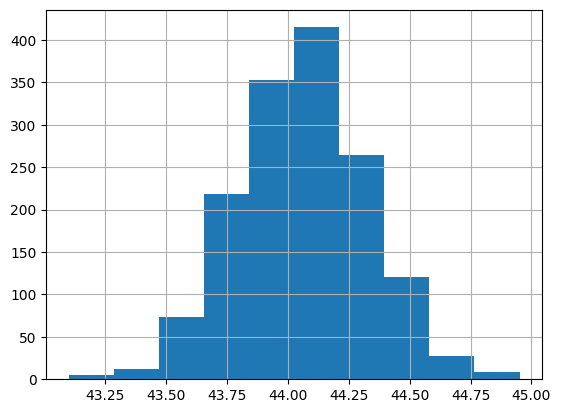

In [79]:
muestras.mean().hist()

Con ello comprobamos que se aproxima batante a una distribución normal.

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

In [80]:
datos.Edad.mean() # La media de la variable Edad original

np.float64(44.07142113482561)

In [81]:
muestras.mean().mean() # La media de nuestras muestras (medidas muestrales)

np.float64(44.063535333333334)

Nos da un valor bastante aproximado también.

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [82]:
muestras.mean().std() # La desviación estándar de las nuestras muestras (medidas muestrales)

0.2661730736851349

In [83]:
datos.Edad.std() # La desviación estándar de la variable Edad original

12.480583465360187

In [84]:
datos.Edad.std() / np.sqrt(n) # La desviación estándar de las nuestras muestras (medidas muestrales)

np.float64(0.2790743302740527)

Obtenemos un valor bastante aproximado a la DesvSTD de la muestras, de acuerdo con lo que señala el Teorema Central del Límite.

## <font color=green>4.2 Los niveles de confianza y significación</font>
***

El **nivel de confianza** ($1 - \alpha$) representa la probabilidad de que la estimación sea correcta. Además, el **nivel de significancia** ($\alpha$) expresa la probabilidad de error de la estimación.

El **nivel de confianza** representa el grado de confiabilidad del resultado estimado dentro de un cierto rango. Cuando establecemos un **nivel de confianza del 95%** en una encuesta, por ejemplo, estamos asumiendo que existe una probabilidad del 95% de que los resultados de la encuesta representen bien la realidad, es decir, sean correctos.

El **nivel de confianza** de una estimación se puede obtener del área bajo la curva normal como se muestra en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img007.png' width='450px'>


## <font color=green>4.3 Error inferencial</font>
***

El **error inferencial** se define por la **desviación estándar de las medias muestrales** $\sigma_\bar{x}$ y por el **nivel de confianza** determinado para el proceso.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

## <font color=green>4.4 Intervalos de confianza</font>
***

### Intervalo de confianza para la media poblacional

#### Con desviación estándar poblacional conocida

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar de población desconocida

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

## <font color='blue'>Ejemplo: </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una población normal con **desviación estándar igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un intervalo de confianza para el **promedio de la población** asumiendo un **nivel de significancia del 5%**.

### Media muestral

In [85]:
media_muestral=5050
media_muestral

5050

### Nivel de significancia ($\alpha$)

In [86]:
significancia=0.05
significancia

0.05

### Nivel de confianza ($1 - \alpha$)

In [87]:
confianza=1-significancia
confianza

0.95

### Obteniendo $z$

In [88]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabla_normal_estandarizada = pd.DataFrame(
    [],
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabla_normal_estandarizada.index:
    for column in tabla_normal_estandarizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabla_normal_estandarizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabla_normal_estandarizada.rename_axis('Z', axis = 'columns', inplace = True)

tabla_normal_estandarizada[16:26]


Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


### Obteniendo $z$

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img008.png' width='450px'>

In [89]:
# Para calcular el valor medio de la zona sombreada, ya sé que el valor de la media hacia la izquierda es 0.5
# Entonces puedo saber el valor desde -8 acostado hasta un valor de z específico (+1.96)
0.95/2  # nivel de significancia dividido en 2. Esta es la probabilidad de la media hasta el valor de z

0.475

In [90]:
# Ahora calculamos el valor del extremo izquierdo hasta el valor de z
0.5+(0.95/2) # Tomamos el área de 0,5, que es de la media hacia la izquierda y sumamos el área desde la media hasta +1.96

0.975

Con este valor, entramos a la tabla al revés, es decir, tenemos la probabilidad y determinamos z.<br>

|Z	|0.00	|0.01	|0.02	|0.03	|0.04	|0.05	| <u>**[0.06]**</u>	|0.07	|0.08	|0.09|
|---|---|---|---|---|---|---|---|---|---|---|
|1.60	|0.9452	|0.9463	|0.9474	|0.9484	|0.9495	|0.9505	|0.9515	|0.9525|0.9535|0.9545|
|1.70	|0.9554	|0.9564	|0.9573	|0.9582	|0.9591	|0.9599	|0.9608	|0.9616	|0.9625	|0.9633|
|1.80	|0.9641	|0.9649	|0.9656	|0.9664	|0.9671	|0.9678	|0.9686	|0.9693	|0.9699	|0.9706|
|<u>**[1.90]**</u>	|0.9713	|0.9719	|0.9726	|0.9732	|0.9738	|0.9744	|<u>**0.9750**</u>	|0.9756	|0.9761	|0.9767|
|2.00	|0.9772	|0.9778	|0.9783	|0.9788	|0.9793	|0.9798	|0.9803	|0.9808	|0.9812	|0.9817|


In [91]:
1.9 + 0.06

1.96

In [92]:
z=norm.ppf(0.975)
z

np.float64(1.959963984540054)

### Valores de $z$ para los niveles de confianza más utilizados

|Nivel de<br>confianza|Valor del área bajo<br>la curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0.95                               |1.645|
|95%               |0.975                              |1.96 |
|99%               |0.995                              |2.575|

### Obteniendo $\sigma_\bar{x}$

In [93]:
desviacion_estandar = 150
desviacion_estandar

150

In [94]:
n = 20
n

20

In [95]:
# Calculamos las desviaciones estándar de las medias muestrales
raiz_de_n=np.sqrt(n)
print('Raíz cuadrada de n: ',raiz_de_n)
sigma = desviacion_estandar / raiz_de_n
print('Desviación estándar de las medias muestrales:', sigma)


Raíz cuadrada de n:  4.47213595499958
Desviación estándar de las medias muestrales: 33.54101966249684


In [96]:
sigma = desviacion_estandar / raiz_de_n
sigma

np.float64(33.54101966249684)

En el siguiente paso necesitamos determinar el error

### Obteniendo $e$

In [97]:
e=z*sigma
e

np.float64(65.73919054324361)

### Solución 1 - Calculando el intervalo de confianza para la media

In [98]:
intervalo=(
    media_muestral-e,
    media_muestral+e
)
intervalo

(np.float64(4984.260809456757), np.float64(5115.739190543243))

El peso medio de los sacos, tiene un 95% de probabilidad de estar entre 4984,26 y 5115.74

### Solución 2 - Calculando el intervalo de confianza para la media

In [99]:
# Alternativa para versiones antiguas
norm.interval(0.95, loc=media_muestral, scale=sigma)

(np.float64(4984.260809456757), np.float64(5115.739190543243))

#####Ejercicio 4_1
Para estimar la cantidad media gastada por cada cliente de una gran cadena de comida rápida, se seleccionó una muestra de 50 clientes.

Suponiendo que el valor de la desviación estándar de la población es de $ 6,00 y que esta población se distribuye normalmente, obtenga el margen de error de esta estimación para un nivel de confianza del 95%.

In [100]:
from scipy.stats import norm
import numpy as np

z = norm.ppf(0.975)
desviacion_estandar = 6
n = 50

e = z * (desviacion_estandar / np.sqrt(n))
print(f"$ {e:0.2f}")

$ 1.66


#####Ejercicio 4_2
Una muestra aleatoria simple de 1976 elementos de una población distribuida normalmente, con una desviación estándar de 11, dio como resultado una media muestral de 28.

¿Cuál es el intervalo de confianza del 90% para la media de la población?

In [101]:
from scipy.stats import norm
import numpy as np

media_muestral = 28
desviacion_estandar = 11
n = 1976

norm.interval(0.90, loc = media_muestral, scale = desviacion_estandar / np.sqrt(n))

(np.float64(27.592969951356466), np.float64(28.407030048643534))

# <font color=green>5 CÁLCULO DEL TAMAÑO DE LA MUESTRA</font>
***

## <font color='red'>Problema </font>

Estamos estudiando los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil. Nuestro supervisor determinó que el **error máximo en relación a la media es de R$\$$ 10,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

## <font color=green>5.1 Variables cuantitativas y población infinita</font>
***

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar conocida

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Con desviación estándar desconocida

## $$n = \left(z\frac{s}{e}\right)^2$$

Donde:

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar de la muestra

$e$ = error inferencial

### <font color='red'>Comentarios</font>

1. La desviación estándar ($\sigma$ o $s$) y el error ($e$) deben estar en la misma unidad de medida.

2. Cuando el error ($e$) se representa en términos porcentuales, debe interpretarse como un porcentaje relacionado con el promedio.

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando los ingresos mensuales de los jefes de hogar. Nuestro supervisor determinó que el **error máximo en relación a la media es de $\$$ 100,00** pesos. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **$\$$ 3.323,39** pesos. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

Ahora tenemos que interpretar estos datos para determinar cuál sería el tamaño de muestra adecuado, para que sea representativo de la población.<br>
Primero calcularemos el valor de z.<br>
De la interpretación de la curva.<br>
<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img008.png' width='450px'>

In [102]:
# De la interpretación de la curva
0.95/2

0.475

In [103]:
0.5 + (0.95/2) # Este será el valor de la probabilidad para calcular el tamaño de la muestra

0.975

In [104]:
z=norm.ppf(0.975)
z

np.float64(1.959963984540054)

### Obteniendo $\sigma$

In [105]:
sigma=3323.39
sigma

3323.39

### Obteniendo $e$

In [107]:
# Nuestro supervisor determinó que el error máximo en relación a la media es de  $  100,00 pesos
e=100
e

100

### Obteniendo $n$

#### Con desviación estándar conocida

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

In [111]:
# Aplicamos la fórmula y obtenemos el tamaño de la muestra
n=(z*(sigma/e))**2
int(n.round())

4243

Entonces necesitamos 4.243 elementos para garantizar que nuestra muestra sea representativa de la población.

Ejercicio 06_1 Calculando el tamaño de la muestra<br>

El valor promedio gastado por los clientes en una tienda es de 45.50 pesos <br>
Suponiendo que la desviación estándar de los gastos es de $ 15.00, ¿cuál debería ser el tamaño de la muestra para estimar la media de la población con un nivel de significancia del 10%?

Tenga en cuenta que el error máximo aceptable es del 10%.


In [112]:
from scipy.stats import norm

media = 45.5
sigma = 15
significancia = 0.10
confianza = 1 - significancia

z = norm.ppf(0.5 + (confianza / 2))
error_porcentual = 0.10
e = media * error_porcentual

n = (z * (sigma / e)) ** 2
n.round()

np.float64(29.0)

---
---

## <font color='red'>Problema</font>

En un lote de **10 000 latas** de gaseosa, se realizó una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviación estándar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error máximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¿qué tamaño de muestra se debe seleccionar para este estudio?

## <font color=green>5.2 Variables cuantitativas y población finita</font>
***

#### Con desviación estándar conocida

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Con desviación estándar desconocida

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Donde:

$N$ = tamaño de la población

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar muestral

$e$ = error inferencial

## <font color='blue'>Ejemplo: Industria de refrescos</font>

En un lote de **10 000 latas** de gaseosa, se realizó una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviación estándar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error máximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¿qué tamaño de muestra se debe seleccionar para este estudio?<br>





Como el problema señala la desviación estándar, utilizaremos la siguiente fórmula.<br>

#### Con desviación estándar conocida

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

$N$ = tamaño de la población<br>
$z$ = variable normal estandarizada<br>
$\sigma$ = desviación estándar poblacional<br>
$s$ = desviación estándar muestral<br>
$e$ = error inferencial (que debe estar en la misma unidad de medida de la desviación estándar para la media)<br>

### Obteniendo $N$

In [118]:
# Tamaño de la población 10.000 latas
N=10000
N

10000

### Obteniendo $z$

In [115]:
# Distribución normal (nivel de confianza 95%) (0.5 representa la mitad de la curva)
z=norm.ppf(0.5 + (0.95/2))
z

np.float64(1.959963984540054)

### Obteniendo $s$

In [117]:
# valor de la desviación estándar de la muestra (12 ml)
s=12
s

12

### Obteniendo $e$

In [119]:
# Error es de 5 ml, y está en la misma unidad de medida que la desviación estándar de la muestra.
e=5
e

5

### Obteniendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [120]:
n=(z**2 * (s**2) * N) / ((z**2 * (s**2)) + (e**2 * (N-1)))
int(n.round())

22

Esta es una muestra representativa de la población pues cumple los requisitos del nivel de confianza del 95%, teniendo en cuenta que tenemos una desviación estándar de la muestra de 5 ml con repecto a la media de la población.<br>
Con esta muestra de 22 unidades, tenemos un valor razonable para retirar 22 latas para chequearlas.<br>
**El tamaño de muestra nos permite administrar el trabajo, para hacer las cosas de la manera mas eficientemente posible**, pues en este caso, pasamos de 100 latas a sólo 22, con el consiguiente menor valor en el costo de la muestra.

#####Ejercicio 5_1
Un fabricante de harina encontró que, en una muestra aleatoria compuesta por 200 sacos de 25 kg de un lote compuesto por 2000 sacos, mostraba una desviación estándar muestral del peso igual a 480 g.

Considerando un error máximo asociado con el promedio poblacional de 0.3 kg y un nivel de confianza del 95%, ¿qué tamaño de muestra debe seleccionarse para obtener una estimación confiable del parámetro poblacional?

In [121]:
from scipy.stats import norm

N = 2000
z = norm.ppf(0.5 + (0.95 / 2))
s = 480
e = 0.3 * 1000   # Convirtiendo kg para g

n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
int(n.round())

10

# <font color=green>6 FIJANDO EL CONTENIDO</font>
***

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando **los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil**. Nuestro supervisor determinó que el **error máximo en relación a la media es de R$\$$ 10,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79** y que la **media poblacional** es **R$\$$ 1.426,54**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio? ¿Cuál es el intervalo de confianza para la media considerando el tamaño de muestra obtenido?

### Construyendo el conjunto de datos según lo especificado por el problema

### Calcular el tamaño de la muestra

### Calcular el intervalo de confianza para la media

### Realización de una prueba gráfica